# 72 Years Of Formula 1 Data Analysis :
Formula One is the highest class of international racing for open-wheel single-seater formula racing cars sanctioned by the FIA. From the British Grand Prix in 1950, this sport has not just enthralled racing fans around the world but also has been a platform for innovations and cutting edge technological developments. Being an F1 fan myself, I thought I would do my first data analysis project on the 70-year history of the sport.I will be using Numpy,Pandas,matplotlib and seaborn libraries in Python.


## Importing Libraries 
importing the necessary python libraries need for this project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

## Importing the datasets
Here we are import the necessary datasets which we will use for our analysis

In [17]:
races = pd.read_csv('races.csv')
constructor=pd.read_csv('constructors.csv')
circuit=pd.read_csv('circuits.csv')
result=pd.read_csv('results.csv')
driver=pd.read_csv('drivers.csv')
driver_stat=pd.read_csv('driver_status.csv')
lewis=pd.read_csv('lewis_stat.csv')
country_hosts=pd.read_csv('country_hosts.csv')

## Races
we will start with the races in formula one and answer the following questions:
1. How many races have been held so far?


In [7]:
#How many races have been held so far?   
races_held = len(races)
print('The total number of races held so far is {}'.format(race_held))

The total number of races held so far is 1079


2. How many races have been held per season over the years


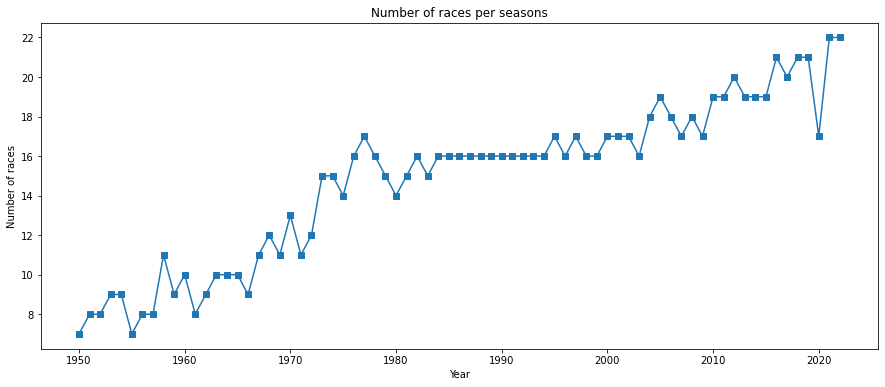

In [9]:
#Number of races held per season over the years?   
no_of_races_per_season= races.groupby(['year']).count()
plt.figure(figsize=(15, 6))

plt.plot(no_of_races_per_season.raceId, marker='s')
plt.xlabel('Year')
plt.ylabel('Number of races')
plt.title("Number of races per seasons");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


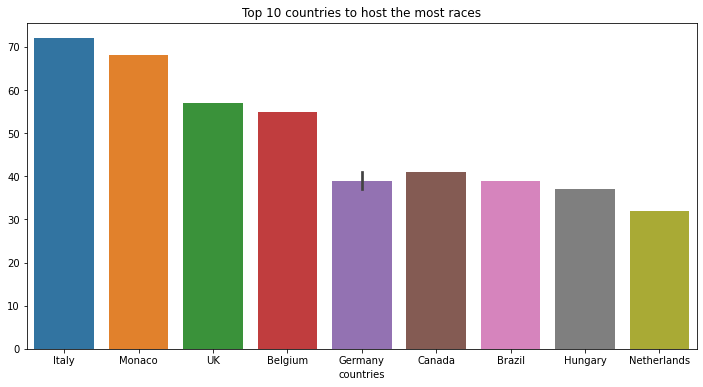

In [20]:
#Top 10 countries to host the most races
host_country = country_hosts.groupby(['circuitId','country']).nunique().sort_values('raceId',ascending =False).reset_index().head(10)

plt.figure(figsize = (12,6))

sns.barplot(host_country.country,host_country.raceId)
plt.title('Top 10 countries to host the most races')
plt.xlabel('countries')
plt.ylabel('');

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


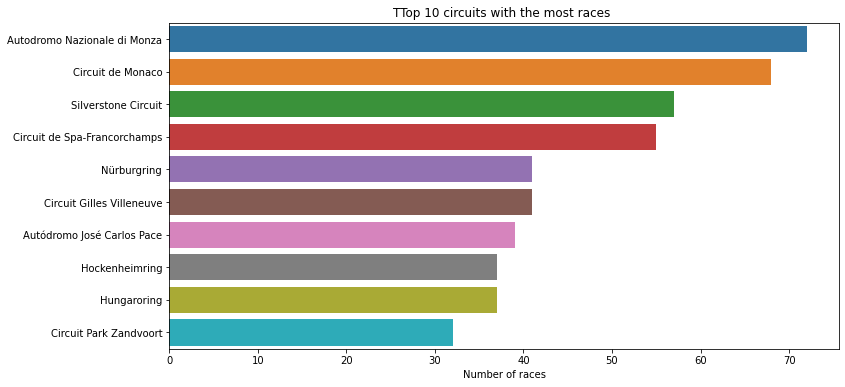

In [22]:
#Top 10 circuits with the most races held
race= races.drop(['date','time','url','round'],axis=1).rename(columns={'name': 'grandprix'})
circuits = circuit.drop(['lat','lng','alt','url'],axis = 1).rename(columns={'name':'circuits'})
hosts=race.merge(circuits,how='right')
top_hosts = hosts[['circuits']].circuits.value_counts().reset_index().rename(
           columns={'index': 'name', 'circuits': 'counts'}).head(10)
plt.figure(figsize = (12,6))

sns.barplot(top_hosts.counts, top_hosts.name)
plt.title('TTop 10 circuits with the most races ')
plt.xlabel('Number of races')
plt.ylabel('');


In [24]:
#Total number of circuits f1 has raced
hosts_cir=hosts['circuitId'].nunique()
print('the total number of circuits f1 has raced is {}'.format(hosts_cir))

the total number of circuits f1 has raced is 79


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


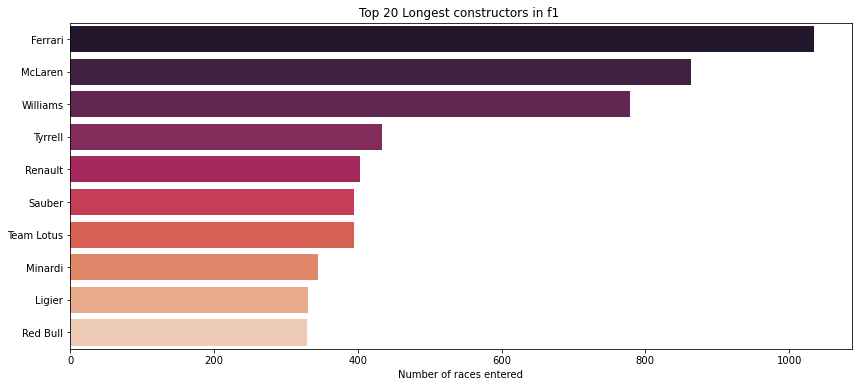

In [26]:
#Top 10 longest constructors in f1
data1 = result.groupby(['constructorId', 'raceId']).size()
data2 = data1.groupby('constructorId').count().reset_index().rename(columns = {0:'races_ent'}) # Count number of races entered by constructors
races_entered = data2.merge(constructor, on = 'constructorId')

races_entered_top= races_entered.drop(['url'],axis=1).sort_values('races_ent',ascending = False).head(10)
plt.figure(figsize = (14,6))

sns.barplot(races_entered_top.races_ent, races_entered_top.name,palette="rocket")
plt.title('Top 20 Longest constructors in f1 ')
plt.xlabel('Number of races entered')
plt.ylabel('');

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


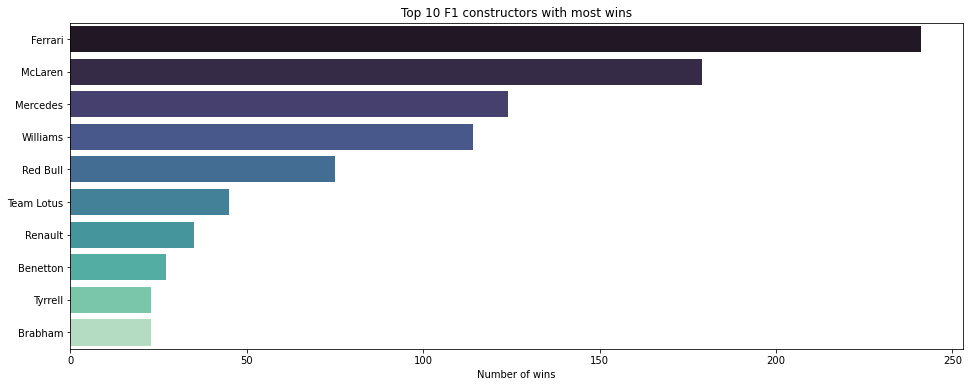

In [29]:
#Top 10 F1 constructors with most wins
const_wins = result[result['position']=='1']
const_wins = result.drop_duplicates(subset = ['raceId'])
const_wins_count = const_wins[['constructorId', 'raceId']].groupby('constructorId').count().reset_index().rename(columns = {'raceId':'wins'}).sort_values('wins', ascending = False)
const_wins_count = const_wins_count.merge(constructor, on = 'constructorId')

plt.figure(figsize = (16,6))

sns.barplot(const_wins_count.head(10).wins, const_wins_count.head(10).name, palette='mako')
plt.title('Top 10 F1 constructors with most wins')
plt.xlabel('Number of wins')
plt.ylabel('');


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


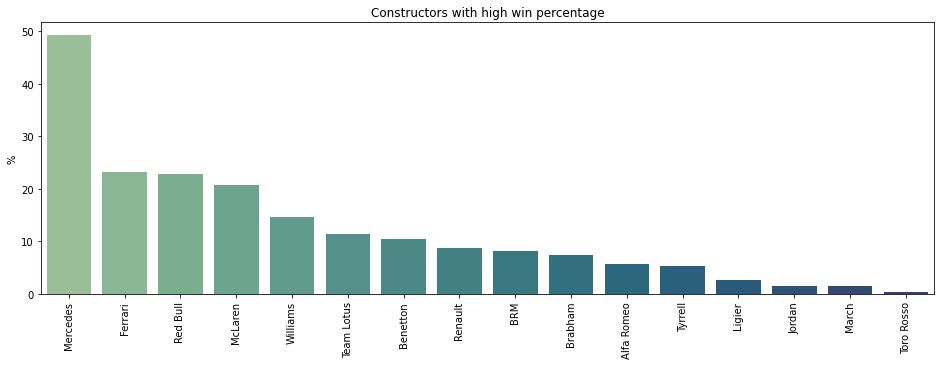

In [33]:
#Constructors with highest win percentage
const_wins_percent = const_wins_count[['constructorId','wins']].merge(races_entered[['races_ent','constructorId','name']], on='constructorId')
const_wins_percent['win_percent'] = const_wins_percent['wins']*100/const_wins_percent['races_ent']
const_wins_percent= const_wins_percent[const_wins_percent['races_ent']>100].sort_values('win_percent', ascending=False)

plt.figure(figsize=(16,5))
sns.barplot(const_wins_percent.name, const_wins_percent.win_percent,palette='crest')
plt.xticks(rotation=90)
plt.title('Constructors with high win percentage')
plt.xlabel('')
plt.ylabel('%');

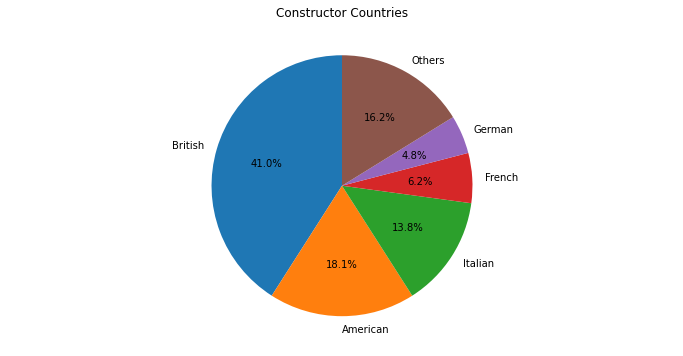

In [39]:
#constructors countries based on headquarters
const_country = races_entered[['constructorId', 'nationality']].groupby(
    'nationality').count().rename(columns = {'constructorId' : 'counts'}) 

const_country = const_country[const_country.counts >= 10].sort_values('counts', ascending = False)
const_country.loc['Others'] = [(len(races_entered) - const_country.counts.sum())] 

plt.figure(figsize=(12,6))
plt.axis('equal')

plt.title('Constructor Countries')
plt.pie(const_country.counts,labels=const_country.index, autopct='%1.1f%%',startangle=90);


In [42]:
#Number of countries in which a driver has represented in formula 1
driver_nat = driver.nationality.nunique()
print('The number of countries which a driver has represented in formula 1 is {}'.format(driver_nat))

The number of countries which a driver has represented in formula 1 is 42


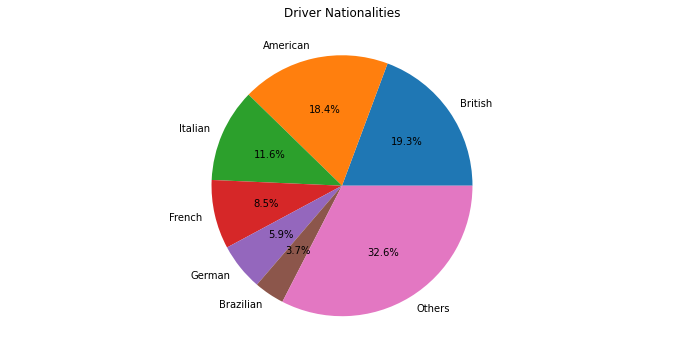

In [44]:
#Most driver nationalites
driver_nat= driver[['driverId','nationality']].groupby('nationality').count().rename(columns = {'driverId':'counts'})
driver_nat= driver_nat[driver_nat.counts > 30].sort_values('counts',ascending = False)
driver_nat.loc['Others'] = [(len(driver) - driver_nat.counts.sum())]

plt.figure(figsize=(12,6))
plt.axis('equal')

plt.title('Driver Nationalities')
plt.pie(driver_nat.counts, labels=driver_nat.index, autopct='%1.1f%%', startangle=0);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


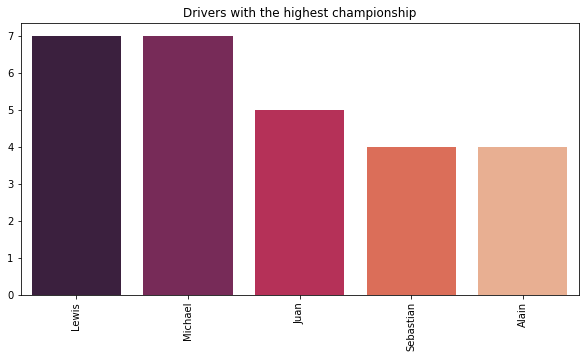

In [48]:
#Drivers with the higest championship
driver_titles = driver_stat.sort_values('titles',ascending = False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(driver_titles.forename, driver_stat.titles,palette='rocket')
plt.xticks(rotation=90)
plt.title('Drivers with the highest championship')
plt.xlabel('')
plt.ylabel('');

In [50]:
#Most experienced driver based on race driven
print('The most experienced driver based on races driven is {} {} with {} race entries.'.format(
    driver_stat.sort_values('races').tail(1).squeeze().forename, 
    driver_stat.sort_values('races').tail(1).squeeze().surname, 
    driver_stat.sort_values('races').tail(1).squeeze().races))

The most experienced driver based on races driven is Kimi Räikkönen with 352 race entries.


In [52]:
#Most  experienced driver based on race win
print('The most experienced driver in terms of race wins is {} {} with {} races won.'.format(
    driver_stat.sort_values('win').tail(1).squeeze().forename, 
    driver_stat.sort_values('win').tail(1).squeeze().surname, 
    driver_stat.sort_values('win').tail(1).squeeze().win))

The most experienced driver in terms of race wins is Lewis Hamilton with 103 races won.


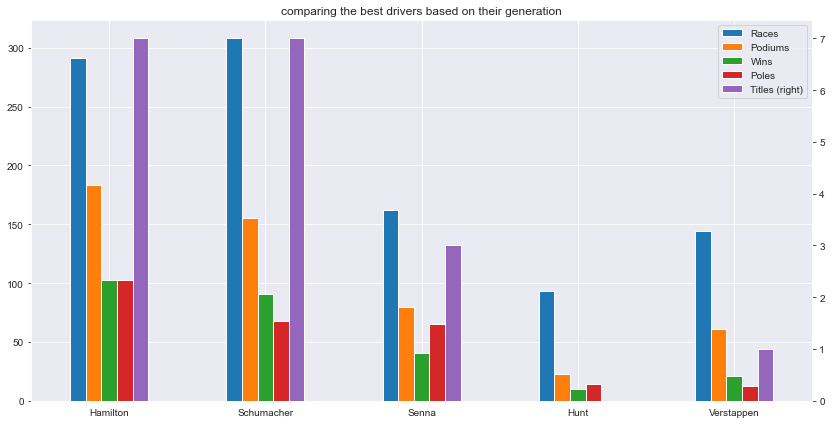

In [57]:
#comparing the best drivers based on their generation  
driver_names = driver_stat[(driver_stat['surname'].isin(['Schumacher', 'Hamilton', 'Verstappen', 'Senna', 'Hunt']))
            & (driver_stat['forename'].isin(['Michael', 'Lewis', 'Max', 'Ayrton', 'James']))]

top_drivers = driver_names.drop(['driverId', 'forename', 'nationality', 'points', 'laps', 'fastestLap','Unnamed: 0']
                        , axis = 1).set_index('surname')
top_drivers = top_drivers.rename(columns = 
                                 {'races':'Races', "podium":'Podiums', 'win':'Wins', 'pole':'Poles', 'titles':'Titles'})

sns.set_style('dark')

top_drivers.plot(secondary_y = 'Titles', kind = 'bar', figsize=(14,7), title = 'comparing the best drivers based on their generation', 
                 xlabel = '', rot = 0, grid = True);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


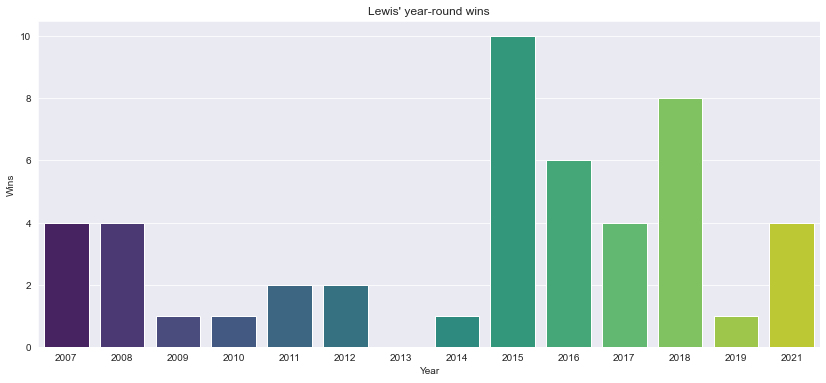

In [63]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 6))

sns.barplot(lewis.year, lewis.wins,palette="viridis")
plt.xlabel('Year')
plt.ylabel('Wins')
plt.title("Lewis' year-round wins");